In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [5]:
germany_geo = r'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis/germany-states.geojson'

In [6]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis/germany-states.geojson',)
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 0, 'properties': {'ID_0': 86, 'ISO': 'DEU', 'NAME_0': 'Germany', 'ID_1': 1, 'NAME_1': 'Baden-Württemberg', 'NL_NAME_1': None, 'VARNAME_1': None, 'TYPE_1': 'Land', 'ENGTYPE_1': 'State'}, 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[9.650460243225211, 49.7763404846192], [9.637469291687069, 49.69042205810558], [9.671889305114973, 49.683181762695426], [9.715788841247615, 49.724449157714844], [9.73471069335966, 49.683601379394645], [9.795839309692326, 49.72497940063482], [9.836868286132812, 49.69924926757807], [9.83308029174799, 49.65090179443382], [9.880538940429688, 49.60306167602539], [9.825579643249796, 49.550659179687614], [9.865819931030273, 49.53993988037121], [9.921249389648722, 49.58118057250982], [9.90511894226097, 49.5551109313966], [9.933589935302848, 49.55537033081055], [9.94201946258545, 49.47780990600609], [10.021670341491813, 49.47856903076166], [10.070828437805176, 49.54175186157238], [10.089150428772086, 49.504989624023665], [10.1290397

In [7]:
# To Define path 
path = r'/Users/oluwaseunodusanya/Desktop/23.07.2023_Germany Apartment Rental Offer Analysis'

In [8]:
df_rental = pd.read_csv(os.path.join(path, '02 Data','02 Prepared Data','clean_apartment_rental_data.csv'), index_col = False)

In [10]:
df_rental.head()

Unnamed: 0                state  service charge  \
0           0  Nordrhein_Westfalen          245.00   
1           1      Rheinland_Pfalz          134.00   
2           2              Sachsen          255.00   
3           3              Sachsen           58.15   
4           4               Bremen          138.00   

                     heating type telekom tv offer  newly constructed  \
0                 central_heating    ONE_YEAR_FREE              False   
1  self_contained_central_heating    ONE_YEAR_FREE              False   
2                   floor_heating    ONE_YEAR_FREE               True   
3                district_heating    ONE_YEAR_FREE              False   
4  self_contained_central_heating              NaN              False   

   balcony  picture count  telekom upload speed  total rent  ...  \
0    False            6.0                  10.0       840.0  ...   
1     True            8.0                  10.0         NaN  ...   
2     True            8.0                   2.4      1300.0  ...   
3     True            9.0                  40.0         NaN  ...   
4     True           19.0                   NaN       903.0  ...   

   number of rooms  energy need floor  garden                   city/town  \
0              4.0        181.4   1.0    True                     Schüren   
1              3.0          NaN   NaN   False              Böhl_Iggelheim   
2              3.0          NaN   3.0   False  Äußere_Neustadt_Antonstadt   
3              3.0         86.0   3.0   False                    Freiberg   
4              3.0        188.9   1.0   False           Neu_Schwachhausen   

   lastRefurbish  electricityBasePrice   date   base rent offer  \
0            NaN                   NaN  May19  Middle base rent   
1         2019.0                   NaN  May19    High base rent   
2            NaN                   NaN  Oct19    High base rent   
3            NaN                   NaN  May19  Middle base rent   
4            NaN                   NaN  Feb20    High base rent   

          rental offer  
0  Middle rental offer  
1                  NaN  
2    High rental offer  
3                  NaN  
4    High rental offer  

[5 rows x 32 columns]

In [11]:
df_rental.shape

(267080, 32)

### 2. Data wrangling 

In [12]:
# Check for missing values

df_rental.isnull().sum()

Unnamed: 0                   0
state                        0
service charge            6852
heating type             44550
telekom tv offer         32284
newly constructed            0
balcony                      0
picture count                0
telekom upload speed     33022
total rent               40233
year constructed         56662
parking spaces          174566
energy source            56531
kitchen                      0
cellar                       0
base rent                    0
living space                 0
condition of flat        68111
interior qual           111906
pets allowed            113754
lift                         0
type of flat             36367
number of rooms              0
energy need             105785
floor                    50900
garden                       0
city/town                    0
lastRefurbish           187030
electricityBasePrice    220483
date                         0
base rent offer              0
rental offer             40233
dtype: i

In [23]:
# Impute missing values with median

df_rental['service charge'].fillna(df_rental['service charge'].median(), inplace=True)
df_rental['telekom upload speed'].fillna(df_rental['telekom upload speed'].median(), inplace=True)
df_rental['total rent'].fillna(df_rental['total rent'].median(), inplace=True)
df_rental['year constructed'].fillna(df_rental['year constructed'].median(), inplace=True)
df_rental['parking spaces'].fillna(df_rental['parking spaces'].median(), inplace=True)
df_rental['energy need'].fillna(df_rental['energy need'].median(), inplace=True)
df_rental['floor'].fillna(df_rental['floor'].median(), inplace=True)
df_rental['lastRefurbish'].fillna(df_rental['lastRefurbish'].median(), inplace=True)
df_rental['electricityBasePrice'].fillna(df_rental['electricityBasePrice'].median(), inplace=True)

In [24]:
# check for missing numerical values/NaN

df_rental.isnull().sum()

Unnamed: 0                   0
state                        0
service charge               0
heating type             44550
telekom tv offer         32284
newly constructed            0
balcony                      0
picture count                0
telekom upload speed         0
total rent                   0
year constructed             0
parking spaces               0
energy source            56531
kitchen                      0
cellar                       0
base rent                    0
living space                 0
condition of flat        68111
interior qual           111906
pets allowed            113753
lift                         0
type of flat             36367
number of rooms              0
energy need                  0
floor                        0
garden                       0
city/town                    0
lastRefurbish                0
electricityBasePrice         0
date                         0
base rent offer              0
rental offer             40233
dtype: i

In [27]:
from sklearn.impute import SimpleImputer
impute_mode = SimpleImputer(strategy = 'most_frequent')
impute_mode.fit(df_rental[['heating type', 'telekom tv offer', 'energy source', 'condition of flat', 'interior qual', 'pets allowed', 'type of flat', 'rental offer']])

df_rental[['heating type', 'telekom tv offer', 'energy source', 'condition of flat', 'interior qual', 'pets allowed', 'type of flat', 'rental offer']] = impute_mode.transform(df_rental[['heating type', 'telekom tv offer', 'energy source', 'condition of flat', 'interior qual', 'pets allowed', 'type of flat', 'rental offer']])

In [28]:
# check for categorical missing values/NaN

df_rental.isnull().sum()

Unnamed: 0              0
state                   0
service charge          0
heating type            0
telekom tv offer        0
newly constructed       0
balcony                 0
picture count           0
telekom upload speed    0
total rent              0
year constructed        0
parking spaces          0
energy source           0
kitchen                 0
cellar                  0
base rent               0
living space            0
condition of flat       0
interior qual           0
pets allowed            0
lift                    0
type of flat            0
number of rooms         0
energy need             0
floor                   0
garden                  0
city/town               0
lastRefurbish           0
electricityBasePrice    0
date                    0
base rent offer         0
rental offer            0
dtype: int64

In [29]:
# To check for duplicates
df_rental_dups = df_rental.duplicated()

In [30]:
df_rental_dups.shape #No duplicates

(267080,)

<Axes: xlabel='service charge', ylabel='Count'>

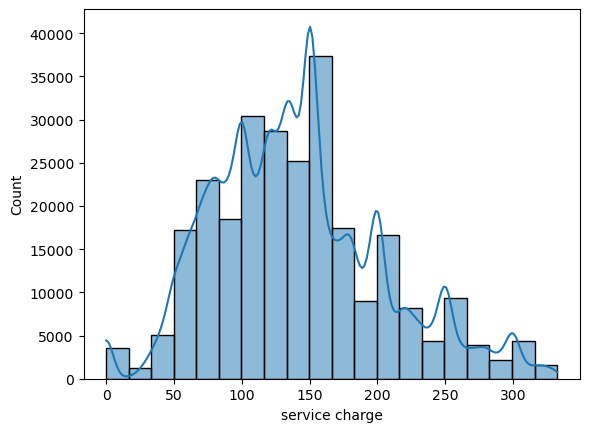

In [31]:
# To check for extreme values/outliers
sns.histplot(df_rental['service charge'], bins=20, kde = True) # shows extreme values for 'service charge'

### Outliers were addressed in the previous exercise

In [33]:
# To check the data types of variables
df_rental.dtypes

Unnamed: 0                int64
state                    object
service charge          float64
heating type             object
telekom tv offer         object
newly constructed          bool
balcony                    bool
picture count           float64
telekom upload speed    float64
total rent              float64
year constructed        float64
parking spaces          float64
energy source            object
kitchen                    bool
cellar                     bool
base rent               float64
living space            float64
condition of flat        object
interior qual            object
pets allowed             object
lift                       bool
type of flat             object
number of rooms         float64
energy need             float64
floor                   float64
garden                     bool
city/town                object
lastRefurbish           float64
electricityBasePrice    float64
date                     object
base rent offer          object
rental o

In [37]:
# To drop unknown column
df_rental = df_rental.drop(columns = ['Unnamed: 0'])

In [38]:
df_rental.columns

Index(['state', 'service charge', 'heating type', 'telekom tv offer',
       'newly constructed', 'balcony', 'picture count', 'telekom upload speed',
       'total rent', 'year constructed', 'parking spaces', 'energy source',
       'kitchen', 'cellar', 'base rent', 'living space', 'condition of flat',
       'interior qual', 'pets allowed', 'lift', 'type of flat',
       'number of rooms', 'energy need', 'floor', 'garden', 'city/town',
       'lastRefurbish', 'electricityBasePrice', 'date', 'base rent offer',
       'rental offer'],
      dtype='object')

### 4. Plotting a choropleth

In [40]:
# Create a data frame with just the states and the values for total rent we want plotted

data_to_plot = df_rental[['state','total rent']]
data_to_plot.head()

state  total rent
0  Nordrhein_Westfalen       840.0
1      Rheinland_Pfalz       650.0
2              Sachsen      1300.0
3              Sachsen       650.0
4               Bremen       903.0

In [45]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = germany_geo, 
    data = data_to_plot,
    columns = ['state', 'total rent'],
    key_on = 'feature.properties.NAME_1', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Apartment rent").add_to(map)
folium.LayerControl().add_to(map)

map

### Analysis Question: Which states/cities in Germany offer more expensive rents than the others?

Hamburg, with the darkest shade of orange has the highest rental offer followed by Bayern and Berlin.

In [46]:
map.save('plot_data.html')